In [ ]:
# Hypothesis 1: 
# Overall, there are more male than female authors. 

# Hypothesis 2: 
# In total, more has been written by men than by women.

# Hypothesis 3:
# A male author is more productive than a female author.

In [1]:
# >>> Preparation
# Import categorized 'names_cat.csv'
import pandas

print("Importing names... ")
names = pandas.read_csv("data/names_cat_i1.csv", usecols=["name", "n_publs", "likely_gender", "score"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names[:5]))

Importing names... 
Names imported. They look like this:                                         name likely_gender  n_publs  score
name                                                                      
'Maseka Lesaoana            'Maseka Lesaoana        female        2      8
(David) Jing Dai            (David) Jing Dai          male        1      7
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng          male        2      2
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        female        2      7
(Zhou) Bryan Bai            (Zhou) Bryan Bai          male        2      6


In [2]:
# Get all data on female and male authors
f = names[names['likely_gender'] == 'female']
m = names[names['likely_gender'] == 'male']

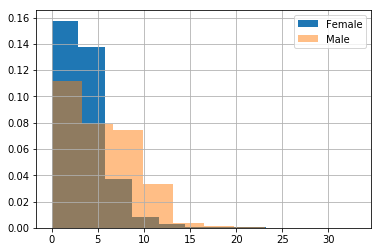

In [23]:
f['score'].hist(density="True", label="Female")
m['score'].hist(density="True", alpha=0.5, label="Male")
plt.legend()

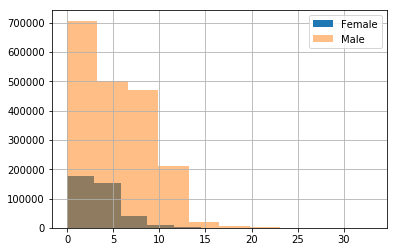

In [24]:
f['score'].hist(label="Female")
m['score'].hist(alpha=0.5, label="Male")
plt.legend()

In [54]:
names_cor_stats = {
    
}

for score_min in range(0,34):
    current = names[names['score'] >= score_min]
    current_f = current[current['likely_gender'] == "female"]
    current_m = current[current['likely_gender'] == "male"]

    names_cor_stats[score_min] = {
        'score_min': score_min,
        
        'pubs_mean': current['n_publs'].mean(),
        'pubs_mean_f': current_f['n_publs'].mean(),
        'pubs_mean_m': current_m['n_publs'].mean(),
        
        'pubs_median': current['n_publs'].median(),
        'pubs_median_f': current_f['n_publs'].median(),
        'pubs_median_m': current_m['n_publs'].median(),
        
        'pubs_total': current['n_publs'].sum(),
        'pubs_f': current_f['n_publs'].sum(),
        'pubs_m': current_m['n_publs'].sum(),
        
        'publs_f_part': current_f['n_publs'].sum() / current['n_publs'].sum(),
        
        'authors_total': len(current['n_publs']),
        'authors_f': len(current_f['n_publs']),
        'authors_m': len(current_m['n_publs']),
        
        'authors_f_part': len(current_f['n_publs']) / len(current['n_publs'])
    }

In [55]:
names_stats = pandas.DataFrame.from_dict(names_cor_stats, orient="index")

In [56]:
names_stats

,score_min,pubs_mean,pubs_mean_f,pubs_mean_m,pubs_median,pubs_median_f,pubs_median_m,pubs_total,pubs_f,pubs_m,publs_f_part,authors_total,authors_f,authors_m,authors_f_part
0,0,5.789820,4.179795,6.114435,2.0,1.0,2.0,13353745,1617564,11736181,0.121132,2306418,386996,1919422,0.167791
1,1,5.850721,4.071149,6.167649,2.0,1.0,2.0,12555887,1320750,11235137,0.105190,2146041,324417,1821624,0.151170
2,2,5.965752,4.059755,6.278961,2.0,1.0,2.0,11407221,1095598,10311623,0.096044,1912118,269868,1642250,0.141136
3,3,6.149533,4.097428,6.452835,2.0,1.0,2.0,10033339,860841,9172498,0.085798,1631561,210093,1421468,0.128768
4,4,6.243068,4.128318,6.500993,2.0,1.0,2.0,8490291,610314,7879977,0.071884,1359955,147836,1212119,0.108707
5,5,6.253112,4.198750,6.441872,2.0,1.0,2.0,7048408,398264,6650144,0.056504,1127184,94853,1032331,0.084150
6,6,6.318679,4.266908,6.449177,2.0,1.0,2.0,5872959,237159,5635800,0.040382,929460,55581,873879,0.059799
7,7,6.375927,4.337194,6.466958,2.0,1.0,2.0,4739322,137797,4601525,0.029075,743315,31771,711544,0.042742
8,8,6.462522,4.370670,6.539362,2.0,1.0,2.0,3601932,86312,3515620,0.023963,557357,19748,537609,0.035432
9,9,6.494503,4.486391,6.567762,2.0,1.0,2.0,2562549,62307,2500242,0.024314,394572,13888,380684,0.035198


In [57]:
print("Saving stats to CSV... ")
names.to_csv("data/names_score_min_stats.csv")
print("Stats saved!")

Saving stats to CSV... 
Stats saved!


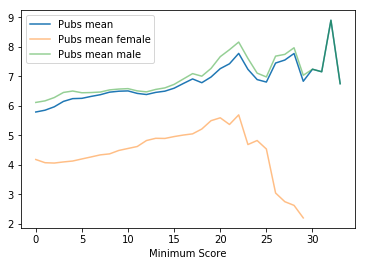

In [63]:
plt.plot(names_stats['score_min'], names_stats['pubs_mean'], label="Pubs mean") #pubs_mean 	pubs_mean_f 	pubs_mean_m
plt.plot(names_stats['score_min'], names_stats['pubs_mean_f'], alpha=0.5, label="Pubs mean female")
plt.plot(names_stats['score_min'], names_stats['pubs_mean_m'], alpha=0.5, label="Pubs mean male")
plt.xlabel("Minimum Score")
plt.legend()

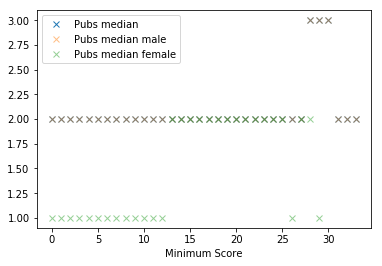

In [78]:
plt.plot(names_stats['score_min'], names_stats['pubs_median'], 'x', label="Pubs median")
plt.plot(names_stats['score_min'], names_stats['pubs_median_m'], 'x', alpha=0.5, label="Pubs median male")
plt.plot(names_stats['score_min'], names_stats['pubs_median_f'], 'x', alpha=0.5, label="Pubs median female")
plt.xlabel("Minimum Score")
plt.legend()

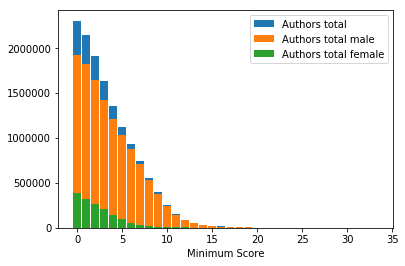

In [74]:
#pubs_total 	pubs_f 	pubs_m
plt.bar(names_stats['score_min'], names_stats['authors_total'], label="Authors total")
plt.bar(names_stats['score_min'], names_stats['authors_m'], label="Authors total male")
plt.bar(names_stats['score_min'], names_stats['authors_f'], label="Authors total female")

plt.xlabel("Minimum Score")
plt.legend()

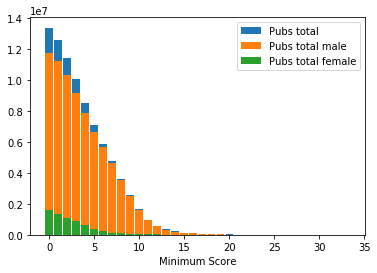

In [73]:
#pubs_total 	pubs_f 	pubs_m
plt.bar(names_stats['score_min'], names_stats['pubs_total'], label="Pubs total")
plt.bar(names_stats['score_min'], names_stats['pubs_m'], label="Pubs total male")
plt.bar(names_stats['score_min'], names_stats['pubs_f'], label="Pubs total female")
plt.xlabel("Minimum Score")
plt.legend()

In [ ]:
# >>> Hypothesis 1 and 2

# Hypothesis 1: 
# Overall, there are more male than female authors. 

# Hypothesis 2: 
# In total, more has been written by men than by women.

In [4]:
# Explore authors and publications per gender
# Absolute values
nauthors_by_gender = names.groupby("likely_gender").size() # Amount of authors per gender
n_publs_by_gender = names.groupby("likely_gender").agg({'n_publs':'sum'}) # Amount of publications per gender

print("{} female authors published {} pieces, {} male authors published {} pieces".format(nauthors_by_gender.values[0], n_publs_by_gender.at['female', 'n_publs'], nauthors_by_gender.values[1], n_publs_by_gender.at['male', 'n_publs']))
print("Men published {} times more than women".format(n_publs_by_gender.at['male', 'n_publs'] / n_publs_by_gender.at['female', 'n_publs']))
print("There are {} times more male than female authors.".format(nauthors_by_gender.values[1] / nauthors_by_gender.values[0]))

386996 female authors published 1617564 pieces, 1919422 male authors published 11736181 pieces
Men published 7.255466244303162 times more than women
There are 4.959798034088208 times more male than female authors.


In [31]:
nauthors_by_gender_cor = names_cor.groupby("likely_gender").size()
n_publs_by_gender_cor = names_cor.groupby("likely_gender").agg({'n_publs':'sum'})

print("{} female authors published {} pieces, {} male authors published {} pieces".format(nauthors_by_gender_cor.values[0], n_publs_by_gender_cor.at['female', 'n_publs'], nauthors_by_gender_cor.values[1], n_publs_by_gender_cor.at['male', 'n_publs']))
print("Men published {} times more than women".format(n_publs_by_gender_cor.at['male', 'n_publs'] / n_publs_by_gender_cor.at['female', 'n_publs']))
print("There are {} times more male than female authors.".format(nauthors_by_gender_cor.values[1] / nauthors_by_gender_cor.values[0]))

147836 female authors published 610314 pieces, 1212119 male authors published 7879977 pieces
Men published 12.911348912199294 times more than women
There are 8.199078708839524 times more male than female authors.


In [ ]:
nauthors_by_gender_uncert = names[names['score'] < 5].groupby("likely_gender").size()
n_publs_by_gender_uncert = names[names['score'] < 5].groupby("likely_gender").agg({'n_publs':'sum'})

print("{} female authors published {} pieces, {} male authors published {} pieces".format(nauthors_by_gender_uncert.values[0], n_publs_by_gender_uncert.at['female', 'n_publs'], nauthors_by_gender_uncert.values[1], n_publs_by_gender_uncert.at['male', 'n_publs']))
print("Men published {} times more than women".format(n_publs_by_gender_uncert.at['male', 'n_publs'] / n_publs_by_gender_uncert.at['female', 'n_publs']))
print("There are {} times more male than female authors.".format(nauthors_by_gender_uncert.values[1] / nauthors_by_gender_uncert.values[0]))

In [6]:
# Visualization
import matplotlib.pyplot as plt

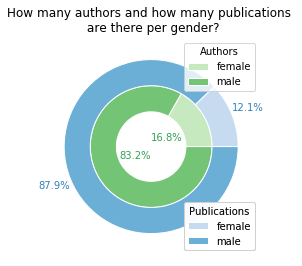

In [7]:
# Visualize absolute values of authors and publications by gender as a pie chart

# Nested pie plot: https://matplotlib.org/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py
# Labelling a pie chart: https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# Placing multiple legends: https://matplotlib.org/tutorials/intermediate/legend_guide.html

import numpy as np

fig, ax = plt.subplots()

size = 0.3

# Colors for the pie chart
cmap = plt.get_cmap("tab20c")
outer_colors = cmap([11,9,20]) # Publications
text_outer = cmap(8)
inner_colors = cmap(np.array([3,1,20])) # Authors
text_inner = cmap(0)

# Authors
wedges_a, texts_a, autotexts_a = ax.pie(nauthors_by_gender.values, radius=1-size, 
                                        colors=outer_colors, autopct='%1.1f%%', # form of percentages
                                        pctdistance=0.3, # how far away are percentages from center?
                                        wedgeprops=dict(width=size, edgecolor='w'), # color of edges
                                        textprops=dict(color=text_outer)) # color of percentages
l_a = ax.legend(wedges_a, nauthors_by_gender.index.values, loc="upper right", title="Authors")
plt.gca().add_artist(l_a) # Add legend

# Publications
wedges_p, texts_p, autotexts_p = ax.pie(n_publs_by_gender['n_publs'], radius=1, 
                                        colors=inner_colors, autopct='%1.1f%%', 
                                        pctdistance=1.2,
                                        wedgeprops=dict(width=size, edgecolor='w'), 
                                        textprops=dict(color=text_inner))
l_p = ax.legend(wedges_p, nauthors_by_gender.index.values, loc="lower right", title="Publications")
plt.gca().add_artist(l_p)


plt.title("How many authors and how many publications \n are there per gender?")

plt.show()

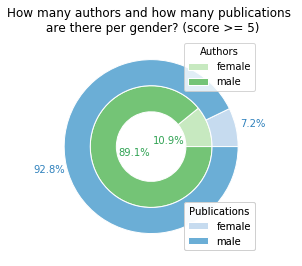

In [32]:
# Visualize absolute values of authors and publications by gender as a pie chart

# Nested pie plot: https://matplotlib.org/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py
# Labelling a pie chart: https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# Placing multiple legends: https://matplotlib.org/tutorials/intermediate/legend_guide.html

import numpy as np

fig, ax = plt.subplots()

size = 0.3

# Colors for the pie chart
cmap = plt.get_cmap("tab20c")
outer_colors = cmap([11,9,20]) # Publications
text_outer = cmap(8)
inner_colors = cmap(np.array([3,1,20])) # Authors
text_inner = cmap(0)

# Authors
wedges_a, texts_a, autotexts_a = ax.pie(nauthors_by_gender_cor.values, radius=1-size, 
                                        colors=outer_colors, autopct='%1.1f%%', # form of percentages
                                        pctdistance=0.3, # how far away are percentages from center?
                                        wedgeprops=dict(width=size, edgecolor='w'), # color of edges
                                        textprops=dict(color=text_outer)) # color of percentages
l_a = ax.legend(wedges_a, nauthors_by_gender_cor.index.values, loc="upper right", title="Authors")
plt.gca().add_artist(l_a) # Add legend

# Publications
wedges_p, texts_p, autotexts_p = ax.pie(n_publs_by_gender_cor['n_publs'], radius=1, 
                                        colors=inner_colors, autopct='%1.1f%%', 
                                        pctdistance=1.2,
                                        wedgeprops=dict(width=size, edgecolor='w'), 
                                        textprops=dict(color=text_inner))
l_p = ax.legend(wedges_p, nauthors_by_gender_cor.index.values, loc="lower right", title="Publications")
plt.gca().add_artist(l_p)


plt.title("How many authors and how many publications \n are there per gender? (score >= 5)")

plt.show()

In [ ]:
# Evaluation: Hypothesis 1 and 2 are correct.

In [ ]:
# >>> Hypothesis 3

# A male author is more productive than a female author.

In [9]:
# Relative values
mean = names['n_publs'].mean() # Overall mean of amount of publications
median = names['n_publs'].median() # Overall median of amount of authors

n_publs_mean_by_gender = names.groupby("likely_gender").agg({'n_publs':'mean'}) # Mean by gender
n_publs_median_by_gender = names.groupby("likely_gender").agg({'n_publs':'median'}) # Median by gender

f_mean = n_publs_mean_by_gender.at["female", "n_publs"] # mean for female authors
m_mean = n_publs_mean_by_gender.at["male", "n_publs"] # mean for male authors

f_median = n_publs_median_by_gender.at["female", "n_publs"] # median for female authors
m_median = n_publs_median_by_gender.at["male", "n_publs"] # median for male authors


print("On average, female authors publish {} pieces each, while male authors publish {} pieces each.".format(f_mean, m_mean))
print("The median for the amount of pieces published by female authors is {} pieces, while the median for the amount of pieces published by male authors is {} pieces.".format(f_median, m_median))

On average, female authors publish 4.179795140001447 pieces each, while male authors publish 6.1144349705275856 pieces each.
The median for the amount of pieces published by female authors is 1 pieces, while the median for the amount of pieces published by male authors is 2 pieces.


In [33]:
# Relative values
mean_cor = names_cor['n_publs'].mean() # Overall mean of amount of publications
median_cor = names_cor['n_publs'].median() # Overall median of amount of authors

n_publs_mean_by_gender_cor = names_cor.groupby("likely_gender").agg({'n_publs':'mean'}) # Mean by gender
n_publs_median_by_gender_cor = names_cor.groupby("likely_gender").agg({'n_publs':'median'}) # Median by gender

f_mean_cor = n_publs_mean_by_gender_cor.at["female", "n_publs"] # mean for female authors
m_mean_cor = n_publs_mean_by_gender_cor.at["male", "n_publs"] # mean for male authors

f_median_cor = n_publs_median_by_gender_cor.at["female", "n_publs"] # median for female authors
m_median_cor = n_publs_median_by_gender_cor.at["male", "n_publs"] # median for male authors


print("On average, female authors publish {} pieces each, while male authors publish {} pieces each.".format(f_mean_cor, m_mean_cor))
print("The median for the amount of pieces published by female authors is {} pieces, while the median for the amount of pieces published by male authors is {} pieces.".format(f_median_cor, m_median_cor))

On average, female authors publish 4.128317865743121 pieces each, while male authors publish 6.500992889312023 pieces each.
The median for the amount of pieces published by female authors is 1 pieces, while the median for the amount of pieces published by male authors is 2 pieces.


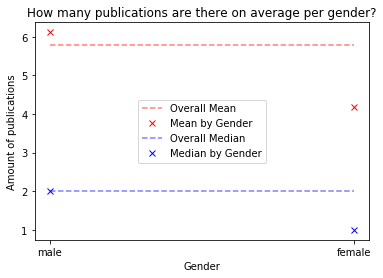

In [11]:
# Visualization
plt_mean = plt.plot(['male', 'female'], [mean, mean], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female'], [m_mean, f_mean], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female'],[median, median], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female'],[m_median, f_median], 'bx', label='Median by Gender')

plt.xlabel('Gender')
plt.ylabel('Amount of publications')

plt.title("How many publications are there on average per gender?")

plt.legend(loc="center")
plt.show()

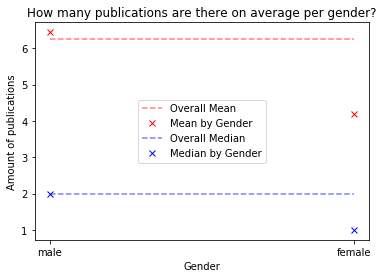

In [12]:
plt_mean = plt.plot(['male', 'female'], [mean_cor, mean_cor], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female'], [m_mean_cor, f_mean_cor], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female'],[median_cor, median_cor], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female'],[m_median_cor, f_median_cor], 'bx', label='Median by Gender')

plt.xlabel('Gender')
plt.ylabel('Amount of publications')

plt.title("How many publications are there on average per gender?")

plt.legend(loc="center")
plt.show()

In [ ]:
# Evaluation: Hypothesis 3 is correct.